## I use syntehtic_digits applicatoin to create synthetic digits and labels and save them in the given files.  

In [1]:
import os
from train import train, model
import synthetic_digits

imsize = model.IMSIZE
images_file = 'data/DIGITS/digits.data'
labels_file = 'data/DIGITS/labels.data'
synthetic_digits.create_images_and_labels(images_file, labels_file, imsize )



In [2]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

num_workers = 0
batch_size = 45





In [3]:
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from collections import Counter
class myDataset(Dataset):
    def __init__(self, transform=None):
        self.transform = transform
        self.digits = np.loadtxt(images_file,dtype=float)
        self.labels = np.loadtxt(labels_file).astype(int)-1
        self.digits = np.reshape(self.digits,(-1,imsize,imsize))
        self.digits = np.array([np.expand_dims(d,2) for d in self.digits])
        c = Counter(self.labels) 
        print(c)
    def __len__(self):
        return len(self.digits)

    def __getitem__(self, idx):
        digit = self.digits[idx]
        if self.transform:
            digit = self.transform(np.uint8(digit))
            digit = self.transform(digit)
        else:
            transform = transforms.ToTensor()
            digit = transform(digit)
        return digit, self.labels[idx]    


In [4]:
train_transform  = transforms.Compose([transforms.ToPILImage(),
        transforms.RandomPerspective(distortion_scale=0.2, p=0.8, interpolation=3),
        transforms.ToTensor()])
train_dataset = myDataset(transform=train_transform)
train_dataset.classes = ['1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']

Counter({0: 110, 1: 110, 2: 110, 3: 110, 4: 110, 5: 110, 6: 110, 7: 110, 8: 110})


In [5]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
        num_workers=num_workers, shuffle=True)

/home/rocio/work/anaconda3/envs/computer-vision/lib/python3.7/site-packages/torchvision/transforms/functional.py:440: UserWarning: torch.gels is deprecated in favour of torch.lstsq and will be removed in the next release. Please use torch.lstsq instead.
  res = torch.gels(B, A)[0]


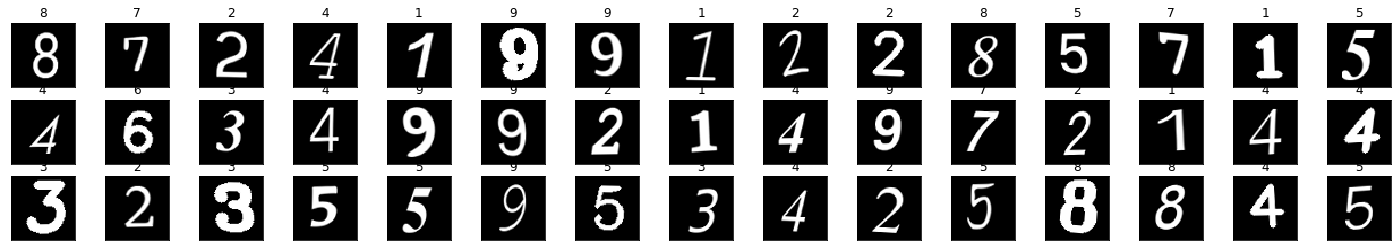

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
    
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(45):
    ax = fig.add_subplot(3, 15, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()+1))
    

In [7]:


model1 = model.CNNet()
#model1.load_state_dict(torch.load('best_model.pth'))
model1.train()

CNNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=12544, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=9, bias=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [8]:
epochs = 10000
learning_rate = 0.005
momentum = 0.9
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train.train(model1, train_loader, epochs, device, learning_rate, momentum,  "best_model.pth", first_epoch = 1)

Epoch: 1, CELoss: 2.196313
Epoch: 2, CELoss: 2.185447
Epoch: 3, CELoss: 2.110196
Epoch: 4, CELoss: 1.294190
Epoch: 5, CELoss: 0.592635
Epoch: 6, CELoss: 0.470598
Epoch: 7, CELoss: 0.225327
Epoch: 8, CELoss: 0.217765
Epoch: 9, CELoss: 0.182724
Epoch: 10, CELoss: 0.140816
Epoch: 11, CELoss: 0.155461
Epoch: 12, CELoss: 0.155963
Epoch: 13, CELoss: 0.143333
Epoch: 14, CELoss: 0.095251
Epoch: 15, CELoss: 0.131793
Epoch: 16, CELoss: 0.117712
Epoch: 17, CELoss: 0.096217
Epoch: 18, CELoss: 0.057236
Epoch: 19, CELoss: 0.064833
Epoch: 20, CELoss: 0.087815
Epoch: 21, CELoss: 0.042944
Epoch: 22, CELoss: 0.085584
Epoch: 23, CELoss: 0.057403
Epoch: 24, CELoss: 0.058556
Epoch: 25, CELoss: 0.048895
Epoch: 26, CELoss: 0.060308
Epoch: 27, CELoss: 0.046998
Epoch: 28, CELoss: 0.033452
Epoch: 29, CELoss: 0.040178
Epoch: 30, CELoss: 0.056668
Epoch: 31, CELoss: 0.057212
Epoch: 32, CELoss: 0.042825
Epoch: 33, CELoss: 0.029768
Epoch: 34, CELoss: 0.044568
Epoch: 35, CELoss: 0.027165
Epoch: 36, CELoss: 0.036253
E

Epoch: 288, CELoss: 0.003288
Epoch: 289, CELoss: 0.001400
Epoch: 290, CELoss: 0.000434
Epoch: 291, CELoss: 0.001074
Epoch: 292, CELoss: 0.007973
Epoch: 293, CELoss: 0.004422
Epoch: 294, CELoss: 0.001570
Epoch: 295, CELoss: 0.003234
Epoch: 296, CELoss: 0.002712
Epoch: 297, CELoss: 0.007989
Epoch: 298, CELoss: 0.000934
Epoch: 299, CELoss: 0.000626
Epoch: 300, CELoss: 0.001336
Epoch: 301, CELoss: 0.001331
Epoch: 302, CELoss: 0.003641
Epoch: 303, CELoss: 0.003186
Epoch: 304, CELoss: 0.007979
Epoch: 305, CELoss: 0.000374
Epoch: 306, CELoss: 0.001454
Epoch: 307, CELoss: 0.003127
Epoch: 308, CELoss: 0.000787
Epoch: 309, CELoss: 0.000127
Epoch: 310, CELoss: 0.000078
Epoch: 311, CELoss: 0.000418
Epoch: 312, CELoss: 0.000449
Epoch: 313, CELoss: 0.002504
Epoch: 314, CELoss: 0.000293
Epoch: 315, CELoss: 0.000649
Epoch: 316, CELoss: 0.000430
Epoch: 317, CELoss: 0.000627
Epoch: 318, CELoss: 0.001626
Epoch: 319, CELoss: 0.000395
Epoch: 320, CELoss: 0.000142
Epoch: 321, CELoss: 0.000679
Epoch: 322, CE

Epoch: 571, CELoss: 0.000568
Epoch: 572, CELoss: 0.000533
Epoch: 573, CELoss: 0.000893
Epoch: 574, CELoss: 0.000604
Epoch: 575, CELoss: 0.003355
Epoch: 576, CELoss: 0.002790
Epoch: 577, CELoss: 0.000147
Epoch: 578, CELoss: 0.000199
Epoch: 579, CELoss: 0.000396
Epoch: 580, CELoss: 0.005370
Epoch: 581, CELoss: 0.000145
Epoch: 582, CELoss: 0.000182
Epoch: 583, CELoss: 0.000447
Epoch: 584, CELoss: 0.000335
Epoch: 585, CELoss: 0.000068
Epoch: 586, CELoss: 0.000342
Epoch: 587, CELoss: 0.000078
Epoch: 588, CELoss: 0.000090
Epoch: 589, CELoss: 0.000029
Epoch: 590, CELoss: 0.000599
Epoch: 591, CELoss: 0.003724
Epoch: 592, CELoss: 0.000744
Epoch: 593, CELoss: 0.000513
Epoch: 594, CELoss: 0.000102
Epoch: 595, CELoss: 0.000106
Epoch: 596, CELoss: 0.000038
Epoch: 597, CELoss: 0.000044
Epoch: 598, CELoss: 0.000068
Epoch: 599, CELoss: 0.000085
Epoch: 600, CELoss: 0.000164
Epoch: 601, CELoss: 0.000317
Epoch: 602, CELoss: 0.000202
Epoch: 603, CELoss: 0.000357
Epoch: 604, CELoss: 0.000056
Epoch: 605, CE

Epoch: 854, CELoss: 0.000017
Epoch: 855, CELoss: 0.002497
Epoch: 856, CELoss: 0.000563
Epoch: 857, CELoss: 0.000760
Epoch: 858, CELoss: 0.000023
Epoch: 859, CELoss: 0.000083
Epoch: 860, CELoss: 0.000284
Epoch: 861, CELoss: 0.000015
Epoch: 862, CELoss: 0.000133
Epoch: 863, CELoss: 0.000009
Epoch: 864, CELoss: 0.000153
Epoch: 865, CELoss: 0.000192
Epoch: 866, CELoss: 0.000670
Epoch: 867, CELoss: 0.000042
Epoch: 868, CELoss: 0.000018
Epoch: 869, CELoss: 0.000028
Epoch: 870, CELoss: 0.000056
Epoch: 871, CELoss: 0.000067
Epoch: 872, CELoss: 0.000051
Epoch: 873, CELoss: 0.000032
Epoch: 874, CELoss: 0.000024
Epoch: 875, CELoss: 0.000012
Epoch: 876, CELoss: 0.000013
Epoch: 877, CELoss: 0.000502
Epoch: 878, CELoss: 0.000026
Epoch: 879, CELoss: 0.000038
Epoch: 880, CELoss: 0.000160
Epoch: 881, CELoss: 0.000211
Epoch: 882, CELoss: 0.000018
Epoch: 883, CELoss: 0.000003
Epoch: 884, CELoss: 0.000135
Epoch: 885, CELoss: 0.000051
Epoch: 886, CELoss: 0.000013
Epoch: 887, CELoss: 0.000018
Epoch: 888, CE

Epoch: 1132, CELoss: 0.000270
Epoch: 1133, CELoss: 0.000023
Epoch: 1134, CELoss: 0.000019
Epoch: 1135, CELoss: 0.000056
Epoch: 1136, CELoss: 0.000014
Epoch: 1137, CELoss: 0.000012
Epoch: 1138, CELoss: 0.000013
Epoch: 1139, CELoss: 0.000070
Epoch: 1140, CELoss: 0.000038
Epoch: 1141, CELoss: 0.000014
Epoch: 1142, CELoss: 0.000007
Epoch: 1143, CELoss: 0.000011
Epoch: 1144, CELoss: 0.000013
Epoch: 1145, CELoss: 0.000005
Epoch: 1146, CELoss: 0.000028
Epoch: 1147, CELoss: 0.000094
Epoch: 1148, CELoss: 0.000033
Epoch: 1149, CELoss: 0.000010
Epoch: 1150, CELoss: 0.000673
Epoch: 1151, CELoss: 0.000018
Epoch: 1152, CELoss: 0.000020
Epoch: 1153, CELoss: 0.000065
Epoch: 1154, CELoss: 0.000128
Epoch: 1155, CELoss: 0.000058
Epoch: 1156, CELoss: 0.001865
Epoch: 1157, CELoss: 0.001194
Epoch: 1158, CELoss: 0.000111
Epoch: 1159, CELoss: 0.000322
Epoch: 1160, CELoss: 0.000012
Epoch: 1161, CELoss: 0.000021
Epoch: 1162, CELoss: 0.000012
Epoch: 1163, CELoss: 0.000006
Epoch: 1164, CELoss: 0.000004
Epoch: 116

Epoch: 1406, CELoss: 0.000036
Epoch: 1407, CELoss: 0.000035
Epoch: 1408, CELoss: 0.000003
Epoch: 1409, CELoss: 0.000001
Epoch: 1410, CELoss: 0.000072
Epoch: 1411, CELoss: 0.000003
Epoch: 1412, CELoss: 0.000051
Epoch: 1413, CELoss: 0.000010
Epoch: 1414, CELoss: 0.000030
Epoch: 1415, CELoss: 0.000013
Epoch: 1416, CELoss: 0.000007
Epoch: 1417, CELoss: 0.000003
Epoch: 1418, CELoss: 0.000047
Epoch: 1419, CELoss: 0.000009
Epoch: 1420, CELoss: 0.000068
Epoch: 1421, CELoss: 0.000007
Epoch: 1422, CELoss: 0.000003
Epoch: 1423, CELoss: 0.000005
Epoch: 1424, CELoss: 0.000059
Epoch: 1425, CELoss: 0.000005
Epoch: 1426, CELoss: 0.000008
Epoch: 1427, CELoss: 0.000021
Epoch: 1428, CELoss: 0.000011
Epoch: 1429, CELoss: 0.000003
Epoch: 1430, CELoss: 0.000006
Epoch: 1431, CELoss: 0.000208
Epoch: 1432, CELoss: 0.000007
Epoch: 1433, CELoss: 0.000016
Epoch: 1434, CELoss: 0.000024
Epoch: 1435, CELoss: 0.000006
Epoch: 1436, CELoss: 0.000004
Epoch: 1437, CELoss: 0.000004
Epoch: 1438, CELoss: 0.000003
Epoch: 143

Epoch: 1680, CELoss: 0.000028
Epoch: 1681, CELoss: 0.000014
Epoch: 1682, CELoss: 0.000012
Epoch: 1683, CELoss: 0.000021
Epoch: 1684, CELoss: 0.000125
Epoch: 1685, CELoss: 0.000062
Epoch: 1686, CELoss: 0.000010
Epoch: 1687, CELoss: 0.000017
Epoch: 1688, CELoss: 0.000159
Epoch: 1689, CELoss: 0.000039
Epoch: 1690, CELoss: 0.001215
Epoch: 1691, CELoss: 0.000051
Epoch: 1692, CELoss: 0.000013
Epoch: 1693, CELoss: 0.000083
Epoch: 1694, CELoss: 0.000021
Epoch: 1695, CELoss: 0.000020
Epoch: 1696, CELoss: 0.000081
Epoch: 1697, CELoss: 0.000056
Epoch: 1698, CELoss: 0.000026
Epoch: 1699, CELoss: 0.000089
Epoch: 1700, CELoss: 0.000009
Epoch: 1701, CELoss: 0.000045
Epoch: 1702, CELoss: 0.000009
Epoch: 1703, CELoss: 0.000009
Epoch: 1704, CELoss: 0.000020
Epoch: 1705, CELoss: 0.000009
Epoch: 1706, CELoss: 0.000011
Epoch: 1707, CELoss: 0.000014
Epoch: 1708, CELoss: 0.000005
Epoch: 1709, CELoss: 0.000040
Epoch: 1710, CELoss: 0.000017
Epoch: 1711, CELoss: 0.000017
Epoch: 1712, CELoss: 0.000007
Epoch: 171

Epoch: 1954, CELoss: 0.000080
Epoch: 1955, CELoss: 0.000015
Epoch: 1956, CELoss: 0.000031
Epoch: 1957, CELoss: 0.000019
Epoch: 1958, CELoss: 0.000029
Epoch: 1959, CELoss: 0.000071
Epoch: 1960, CELoss: 0.003572
Epoch: 1961, CELoss: 0.005073
Epoch: 1962, CELoss: 0.000166
Epoch: 1963, CELoss: 0.000059
Epoch: 1964, CELoss: 0.000049
Epoch: 1965, CELoss: 0.000124
Epoch: 1966, CELoss: 0.000567
Epoch: 1967, CELoss: 0.000015
Epoch: 1968, CELoss: 0.000105
Epoch: 1969, CELoss: 0.000048
Epoch: 1970, CELoss: 0.000030
Epoch: 1971, CELoss: 0.000122
Epoch: 1972, CELoss: 0.000035
Epoch: 1973, CELoss: 0.000042
Epoch: 1974, CELoss: 0.000009
Epoch: 1975, CELoss: 0.000128
Epoch: 1976, CELoss: 0.000689
Epoch: 1977, CELoss: 0.000138
Epoch: 1978, CELoss: 0.000074
Epoch: 1979, CELoss: 0.000067
Epoch: 1980, CELoss: 0.000471
Epoch: 1981, CELoss: 0.000227
Epoch: 1982, CELoss: 0.000014
Epoch: 1983, CELoss: 0.000094
Epoch: 1984, CELoss: 0.000028
Epoch: 1985, CELoss: 0.000027
Epoch: 1986, CELoss: 0.000017
Epoch: 198

Epoch: 2228, CELoss: 0.000249
Epoch: 2229, CELoss: 0.000008
Epoch: 2230, CELoss: 0.000019
Epoch: 2231, CELoss: 0.000111
Epoch: 2232, CELoss: 0.000062
Epoch: 2233, CELoss: 0.001942
Epoch: 2234, CELoss: 0.000062
Epoch: 2235, CELoss: 0.000073
Epoch: 2236, CELoss: 0.000058
Epoch: 2237, CELoss: 0.000058
Epoch: 2238, CELoss: 0.000190
Epoch: 2239, CELoss: 0.000046
Epoch: 2240, CELoss: 0.000515
Epoch: 2241, CELoss: 0.000096
Epoch: 2242, CELoss: 0.001252
Epoch: 2243, CELoss: 0.000025
Epoch: 2244, CELoss: 0.000124
Epoch: 2245, CELoss: 0.000155
Epoch: 2246, CELoss: 0.003398
Epoch: 2247, CELoss: 0.000180
Epoch: 2248, CELoss: 0.002476
Epoch: 2249, CELoss: 0.000064
Epoch: 2250, CELoss: 0.000026
Epoch: 2251, CELoss: 0.000176
Epoch: 2252, CELoss: 0.000544
Epoch: 2253, CELoss: 0.000006
Epoch: 2254, CELoss: 0.000027
Epoch: 2255, CELoss: 0.000034
Epoch: 2256, CELoss: 0.000237
Epoch: 2257, CELoss: 0.000179
Epoch: 2258, CELoss: 0.000062
Epoch: 2259, CELoss: 0.000060
Epoch: 2260, CELoss: 0.000089
Epoch: 226

Epoch: 2502, CELoss: 0.000013
Epoch: 2503, CELoss: 0.000018
Epoch: 2504, CELoss: 0.000091
Epoch: 2505, CELoss: 0.000008
Epoch: 2506, CELoss: 0.000008
Epoch: 2507, CELoss: 0.000009
Epoch: 2508, CELoss: 0.000005
Epoch: 2509, CELoss: 0.000018
Epoch: 2510, CELoss: 0.000007
Epoch: 2511, CELoss: 0.000010
Epoch: 2512, CELoss: 0.000001
Epoch: 2513, CELoss: 0.000009
Epoch: 2514, CELoss: 0.000009
Epoch: 2515, CELoss: 0.000020
Epoch: 2516, CELoss: 0.000010
Epoch: 2517, CELoss: 0.000006
Epoch: 2518, CELoss: 0.000006
Epoch: 2519, CELoss: 0.000012
Epoch: 2520, CELoss: 0.000007
Epoch: 2521, CELoss: 0.001227
Epoch: 2522, CELoss: 0.000011
Epoch: 2523, CELoss: 0.000089
Epoch: 2524, CELoss: 0.000188
Epoch: 2525, CELoss: 0.000147
Epoch: 2526, CELoss: 0.000013
Epoch: 2527, CELoss: 0.000008
Epoch: 2528, CELoss: 0.000010
Epoch: 2529, CELoss: 0.000005
Epoch: 2530, CELoss: 0.000004
Epoch: 2531, CELoss: 0.000007
Epoch: 2532, CELoss: 0.000014
Epoch: 2533, CELoss: 0.000004
Epoch: 2534, CELoss: 0.000051
Epoch: 253

Epoch: 2776, CELoss: 0.000017
Epoch: 2777, CELoss: 0.000048
Epoch: 2778, CELoss: 0.000042
Epoch: 2779, CELoss: 0.000014
Epoch: 2780, CELoss: 0.000040
Epoch: 2781, CELoss: 0.000008
Epoch: 2782, CELoss: 0.007849
Epoch: 2783, CELoss: 0.000388
Epoch: 2784, CELoss: 0.000535
Epoch: 2785, CELoss: 0.000256
Epoch: 2786, CELoss: 0.000047
Epoch: 2787, CELoss: 0.000029
Epoch: 2788, CELoss: 0.000012
Epoch: 2789, CELoss: 0.000029
Epoch: 2790, CELoss: 0.000062
Epoch: 2791, CELoss: 0.000282
Epoch: 2792, CELoss: 0.000042
Epoch: 2793, CELoss: 0.000103
Epoch: 2794, CELoss: 0.000038
Epoch: 2795, CELoss: 0.000042
Epoch: 2796, CELoss: 0.000011
Epoch: 2797, CELoss: 0.000022
Epoch: 2798, CELoss: 0.000064
Epoch: 2799, CELoss: 0.000398
Epoch: 2800, CELoss: 0.000025
Epoch: 2801, CELoss: 0.000030
Epoch: 2802, CELoss: 0.000003
Epoch: 2803, CELoss: 0.000155
Epoch: 2804, CELoss: 0.000023
Epoch: 2805, CELoss: 0.000013
Epoch: 2806, CELoss: 0.000169
Epoch: 2807, CELoss: 0.000014
Epoch: 2808, CELoss: 0.000017
Epoch: 280

Epoch: 3050, CELoss: 0.000004
Epoch: 3051, CELoss: 0.000005
Epoch: 3052, CELoss: 0.000002
Epoch: 3053, CELoss: 0.000005
Epoch: 3054, CELoss: 0.010722
Epoch: 3055, CELoss: 0.000850
Epoch: 3056, CELoss: 0.003759
Epoch: 3057, CELoss: 0.000008
Epoch: 3058, CELoss: 0.000120
Epoch: 3059, CELoss: 0.000007
Epoch: 3060, CELoss: 0.000009
Epoch: 3061, CELoss: 0.000025
Epoch: 3062, CELoss: 0.000028
Epoch: 3063, CELoss: 0.000037
Epoch: 3064, CELoss: 0.000012
Epoch: 3065, CELoss: 0.000026
Epoch: 3066, CELoss: 0.000014
Epoch: 3067, CELoss: 0.001047
Epoch: 3068, CELoss: 0.000037
Epoch: 3069, CELoss: 0.000005
Epoch: 3070, CELoss: 0.000007
Epoch: 3071, CELoss: 0.000002
Epoch: 3072, CELoss: 0.000007
Epoch: 3073, CELoss: 0.000487
Epoch: 3074, CELoss: 0.000034
Epoch: 3075, CELoss: 0.000010
Epoch: 3076, CELoss: 0.001070
Epoch: 3077, CELoss: 0.000022
Epoch: 3078, CELoss: 0.000060
Epoch: 3079, CELoss: 0.000067
Epoch: 3080, CELoss: 0.000212
Epoch: 3081, CELoss: 0.000004
Epoch: 3082, CELoss: 0.000006
Epoch: 308

Epoch: 3324, CELoss: 0.000029
Epoch: 3325, CELoss: 0.000009
Epoch: 3326, CELoss: 0.002126
Epoch: 3327, CELoss: 0.000010
Epoch: 3328, CELoss: 0.000019
Epoch: 3329, CELoss: 0.000080
Epoch: 3330, CELoss: 0.000196
Epoch: 3331, CELoss: 0.000002
Epoch: 3332, CELoss: 0.000036
Epoch: 3333, CELoss: 0.000005
Epoch: 3334, CELoss: 0.000007
Epoch: 3335, CELoss: 0.000033
Epoch: 3336, CELoss: 0.000002
Epoch: 3337, CELoss: 0.000014
Epoch: 3338, CELoss: 0.000016
Epoch: 3339, CELoss: 0.000071
Epoch: 3340, CELoss: 0.000005
Epoch: 3341, CELoss: 0.000009
Epoch: 3342, CELoss: 0.000013
Epoch: 3343, CELoss: 0.000101
Epoch: 3344, CELoss: 0.000275
Epoch: 3345, CELoss: 0.000006
Epoch: 3346, CELoss: 0.000016
Epoch: 3347, CELoss: 0.000085
Epoch: 3348, CELoss: 0.000003
Epoch: 3349, CELoss: 0.000194
Epoch: 3350, CELoss: 0.000488
Epoch: 3351, CELoss: 0.000029
Epoch: 3352, CELoss: 0.000005
Epoch: 3353, CELoss: 0.000011
Epoch: 3354, CELoss: 0.000113
Epoch: 3355, CELoss: 0.000009
Epoch: 3356, CELoss: 0.000499
Epoch: 335

Epoch: 3598, CELoss: 0.000003
Epoch: 3599, CELoss: 0.000055
Epoch: 3600, CELoss: 0.000007
Epoch: 3601, CELoss: 0.000006
Epoch: 3602, CELoss: 0.001331
Epoch: 3603, CELoss: 0.000004
Epoch: 3604, CELoss: 0.000884
Epoch: 3605, CELoss: 0.000162
Epoch: 3606, CELoss: 0.000008
Epoch: 3607, CELoss: 0.000002
Epoch: 3608, CELoss: 0.000009
Epoch: 3609, CELoss: 0.000005
Epoch: 3610, CELoss: 0.000048
Epoch: 3611, CELoss: 0.000020
Epoch: 3612, CELoss: 0.000006
Epoch: 3613, CELoss: 0.000015
Epoch: 3614, CELoss: 0.000002
Epoch: 3615, CELoss: 0.000008
Epoch: 3616, CELoss: 0.000004
Epoch: 3617, CELoss: 0.000007
Epoch: 3618, CELoss: 0.000006
Epoch: 3619, CELoss: 0.000007
Epoch: 3620, CELoss: 0.000284
Epoch: 3621, CELoss: 0.000019
Epoch: 3622, CELoss: 0.000002
Epoch: 3623, CELoss: 0.000001
Epoch: 3624, CELoss: 0.000014
Epoch: 3625, CELoss: 0.000004
Epoch: 3626, CELoss: 0.000005
Epoch: 3627, CELoss: 0.000016
Epoch: 3628, CELoss: 0.000002
Epoch: 3629, CELoss: 0.000005
Epoch: 3630, CELoss: 0.000023
Epoch: 363

Epoch: 3872, CELoss: 0.000001
Epoch: 3873, CELoss: 0.000010
Epoch: 3874, CELoss: 0.000001
Epoch: 3875, CELoss: 0.000003
Epoch: 3876, CELoss: 0.000001
Epoch: 3877, CELoss: 0.000004
Epoch: 3878, CELoss: 0.000014
Epoch: 3879, CELoss: 0.000004
Epoch: 3880, CELoss: 0.000007
Epoch: 3881, CELoss: 0.000023
Epoch: 3882, CELoss: 0.000018
Epoch: 3883, CELoss: 0.000034
Epoch: 3884, CELoss: 0.000003
Epoch: 3885, CELoss: 0.000057
Epoch: 3886, CELoss: 0.000003
Epoch: 3887, CELoss: 0.000000
Epoch: 3888, CELoss: 0.000024
Epoch: 3889, CELoss: 0.000002
Epoch: 3890, CELoss: 0.000002
Epoch: 3891, CELoss: 0.000004
Epoch: 3892, CELoss: 0.000001
Epoch: 3893, CELoss: 0.000004
Epoch: 3894, CELoss: 0.000002
Epoch: 3895, CELoss: 0.000003
Epoch: 3896, CELoss: 0.000001
Epoch: 3897, CELoss: 0.000002
Epoch: 3898, CELoss: 0.000003
Epoch: 3899, CELoss: 0.000177
Epoch: 3900, CELoss: 0.000000
Epoch: 3901, CELoss: 0.000001
Epoch: 3902, CELoss: 0.000001
Epoch: 3903, CELoss: 0.000001
Epoch: 3904, CELoss: 0.000007
Epoch: 390

Epoch: 4146, CELoss: 0.000007
Epoch: 4147, CELoss: 0.000001
Epoch: 4148, CELoss: 0.000000
Epoch: 4149, CELoss: 0.000001
Epoch: 4150, CELoss: 0.000001
Epoch: 4151, CELoss: 0.000000
Epoch: 4152, CELoss: 0.000002
Epoch: 4153, CELoss: 0.000012
Epoch: 4154, CELoss: 0.000001
Epoch: 4155, CELoss: 0.000001
Epoch: 4156, CELoss: 0.000001
Epoch: 4157, CELoss: 0.000000
Epoch: 4158, CELoss: 0.000000
Epoch: 4159, CELoss: 0.000001
Epoch: 4160, CELoss: 0.005415
Epoch: 4161, CELoss: 0.000468
Epoch: 4162, CELoss: 0.003451
Epoch: 4163, CELoss: 0.000045
Epoch: 4164, CELoss: 0.000034
Epoch: 4165, CELoss: 0.002143
Epoch: 4166, CELoss: 0.000877
Epoch: 4167, CELoss: 0.001087
Epoch: 4168, CELoss: 0.000032
Epoch: 4169, CELoss: 0.000026
Epoch: 4170, CELoss: 0.000010
Epoch: 4171, CELoss: 0.000006
Epoch: 4172, CELoss: 0.000006
Epoch: 4173, CELoss: 0.000016
Epoch: 4174, CELoss: 0.000010
Epoch: 4175, CELoss: 0.000023
Epoch: 4176, CELoss: 0.000042
Epoch: 4177, CELoss: 0.000002
Epoch: 4178, CELoss: 0.000003
Epoch: 417

Epoch: 4420, CELoss: 0.000014
Epoch: 4421, CELoss: 0.000015
Epoch: 4422, CELoss: 0.000004
Epoch: 4423, CELoss: 0.000004
Epoch: 4424, CELoss: 0.000001
Epoch: 4425, CELoss: 0.000002
Epoch: 4426, CELoss: 0.000001
Epoch: 4427, CELoss: 0.000003
Epoch: 4428, CELoss: 0.000002
Epoch: 4429, CELoss: 0.000001
Epoch: 4430, CELoss: 0.000001
Epoch: 4431, CELoss: 0.000002
Epoch: 4432, CELoss: 0.000007
Epoch: 4433, CELoss: 0.000038
Epoch: 4434, CELoss: 0.000001
Epoch: 4435, CELoss: 0.000000
Epoch: 4436, CELoss: 0.000006
Epoch: 4437, CELoss: 0.000015
Epoch: 4438, CELoss: 0.000001
Epoch: 4439, CELoss: 0.000006
Epoch: 4440, CELoss: 0.000001
Epoch: 4441, CELoss: 0.000014
Epoch: 4442, CELoss: 0.000001
Epoch: 4443, CELoss: 0.000052
Epoch: 4444, CELoss: 0.000001
Epoch: 4445, CELoss: 0.000001
Epoch: 4446, CELoss: 0.000009
Epoch: 4447, CELoss: 0.000002
Epoch: 4448, CELoss: 0.000001
Epoch: 4449, CELoss: 0.000001
Epoch: 4450, CELoss: 0.000003
Epoch: 4451, CELoss: 0.000001
Epoch: 4452, CELoss: 0.000000
Epoch: 445

Epoch: 4694, CELoss: 0.000051
Epoch: 4695, CELoss: 0.000001
Epoch: 4696, CELoss: 0.000000
Epoch: 4697, CELoss: 0.000000
Epoch: 4698, CELoss: 0.000000
Epoch: 4699, CELoss: 0.000002
Epoch: 4700, CELoss: 0.000272
Epoch: 4701, CELoss: 0.000001
Epoch: 4702, CELoss: 0.000001
Epoch: 4703, CELoss: 0.000001
Epoch: 4704, CELoss: 0.000001
Epoch: 4705, CELoss: 0.001018
Epoch: 4706, CELoss: 0.000550
Epoch: 4707, CELoss: 0.000001
Epoch: 4708, CELoss: 0.000006
Epoch: 4709, CELoss: 0.000001
Epoch: 4710, CELoss: 0.000003
Epoch: 4711, CELoss: 0.000011
Epoch: 4712, CELoss: 0.000002
Epoch: 4713, CELoss: 0.000005
Epoch: 4714, CELoss: 0.000000
Epoch: 4715, CELoss: 0.000006
Epoch: 4716, CELoss: 0.000014
Epoch: 4717, CELoss: 0.000041
Epoch: 4718, CELoss: 0.000001
Epoch: 4719, CELoss: 0.000002
Epoch: 4720, CELoss: 0.000003
Epoch: 4721, CELoss: 0.000001
Epoch: 4722, CELoss: 0.000002
Epoch: 4723, CELoss: 0.000002
Epoch: 4724, CELoss: 0.000002
Epoch: 4725, CELoss: 0.000001
Epoch: 4726, CELoss: 0.000006
Epoch: 472

Epoch: 4968, CELoss: 0.000010
Epoch: 4969, CELoss: 0.000000
Epoch: 4970, CELoss: 0.000001
Epoch: 4971, CELoss: 0.000001
Epoch: 4972, CELoss: 0.000002
Epoch: 4973, CELoss: 0.000000
Epoch: 4974, CELoss: 0.000000
Epoch: 4975, CELoss: 0.000004
Epoch: 4976, CELoss: 0.000002
Epoch: 4977, CELoss: 0.000001
Epoch: 4978, CELoss: 0.000001
Epoch: 4979, CELoss: 0.000000
Epoch: 4980, CELoss: 0.000001
Epoch: 4981, CELoss: 0.000000
Epoch: 4982, CELoss: 0.000001
Epoch: 4983, CELoss: 0.000005
Epoch: 4984, CELoss: 0.000000
Epoch: 4985, CELoss: 0.000000
Epoch: 4986, CELoss: 0.000004
Epoch: 4987, CELoss: 0.000000
Epoch: 4988, CELoss: 0.000006
Epoch: 4989, CELoss: 0.000000
Epoch: 4990, CELoss: 0.000002
Epoch: 4991, CELoss: 0.000001
Epoch: 4992, CELoss: 0.000017
Epoch: 4993, CELoss: 0.000000
Epoch: 4994, CELoss: 0.000001
Epoch: 4995, CELoss: 0.000001
Epoch: 4996, CELoss: 0.000006
Epoch: 4997, CELoss: 0.000001
Epoch: 4998, CELoss: 0.000000
Epoch: 4999, CELoss: 0.000000
Epoch: 5000, CELoss: 0.000001
Epoch: 500

Epoch: 5242, CELoss: 0.000001
Epoch: 5243, CELoss: 0.000003
Epoch: 5244, CELoss: 0.000000
Epoch: 5245, CELoss: 0.000002
Epoch: 5246, CELoss: 0.000017
Epoch: 5247, CELoss: 0.000000
Epoch: 5248, CELoss: 0.000001
Epoch: 5249, CELoss: 0.000001
Epoch: 5250, CELoss: 0.000001
Epoch: 5251, CELoss: 0.000000
Epoch: 5252, CELoss: 0.000000
Epoch: 5253, CELoss: 0.000001
Epoch: 5254, CELoss: 0.000003
Epoch: 5255, CELoss: 0.000001
Epoch: 5256, CELoss: 0.000001
Epoch: 5257, CELoss: 0.000081
Epoch: 5258, CELoss: 0.000006
Epoch: 5259, CELoss: 0.000000
Epoch: 5260, CELoss: 0.000002
Epoch: 5261, CELoss: 0.000000
Epoch: 5262, CELoss: 0.000001
Epoch: 5263, CELoss: 0.000000
Epoch: 5264, CELoss: 0.000000
Epoch: 5265, CELoss: 0.000023
Epoch: 5266, CELoss: 0.000009
Epoch: 5267, CELoss: 0.000000
Epoch: 5268, CELoss: 0.000000
Epoch: 5269, CELoss: 0.000685
Epoch: 5270, CELoss: 0.000000
Epoch: 5271, CELoss: 0.000001
Epoch: 5272, CELoss: 0.000000
Epoch: 5273, CELoss: 0.000000
Epoch: 5274, CELoss: 0.000000
Epoch: 527

Epoch: 5516, CELoss: 0.000000
Epoch: 5517, CELoss: 0.000000
Epoch: 5518, CELoss: 0.000002
Epoch: 5519, CELoss: 0.000001
Epoch: 5520, CELoss: 0.000000
Epoch: 5521, CELoss: 0.000000
Epoch: 5522, CELoss: 0.000001
Epoch: 5523, CELoss: 0.000001
Epoch: 5524, CELoss: 0.000000
Epoch: 5525, CELoss: 0.000002
Epoch: 5526, CELoss: 0.000020
Epoch: 5527, CELoss: 0.000001
Epoch: 5528, CELoss: 0.000001
Epoch: 5529, CELoss: 0.000001
Epoch: 5530, CELoss: 0.000003
Epoch: 5531, CELoss: 0.000023
Epoch: 5532, CELoss: 0.000000
Epoch: 5533, CELoss: 0.000000
Epoch: 5534, CELoss: 0.000012
Epoch: 5535, CELoss: 0.000002
Epoch: 5536, CELoss: 0.000001
Epoch: 5537, CELoss: 0.000000
Epoch: 5538, CELoss: 0.000000
Epoch: 5539, CELoss: 0.000000
Epoch: 5540, CELoss: 0.000002
Epoch: 5541, CELoss: 0.000000
Epoch: 5542, CELoss: 0.000010
Epoch: 5543, CELoss: 0.000000
Epoch: 5544, CELoss: 0.000000
Epoch: 5545, CELoss: 0.000000
Epoch: 5546, CELoss: 0.000002
Epoch: 5547, CELoss: 0.000000
Epoch: 5548, CELoss: 0.000000
Epoch: 554

Epoch: 5790, CELoss: 0.003222
Epoch: 5791, CELoss: 0.000003
Epoch: 5792, CELoss: 0.000023
Epoch: 5793, CELoss: 0.000007
Epoch: 5794, CELoss: 0.000017
Epoch: 5795, CELoss: 0.000014
Epoch: 5796, CELoss: 0.000011
Epoch: 5797, CELoss: 0.000007
Epoch: 5798, CELoss: 0.000009
Epoch: 5799, CELoss: 0.000014
Epoch: 5800, CELoss: 0.000024
Epoch: 5801, CELoss: 0.000008
Epoch: 5802, CELoss: 0.000003
Epoch: 5803, CELoss: 0.000016
Epoch: 5804, CELoss: 0.000006
Epoch: 5805, CELoss: 0.000481
Epoch: 5806, CELoss: 0.000118
Epoch: 5807, CELoss: 0.000004
Epoch: 5808, CELoss: 0.000001
Epoch: 5809, CELoss: 0.000004
Epoch: 5810, CELoss: 0.000010
Epoch: 5811, CELoss: 0.000002
Epoch: 5812, CELoss: 0.000014
Epoch: 5813, CELoss: 0.000009
Epoch: 5814, CELoss: 0.000003
Epoch: 5815, CELoss: 0.000018
Epoch: 5816, CELoss: 0.000014
Epoch: 5817, CELoss: 0.000002
Epoch: 5818, CELoss: 0.000050
Epoch: 5819, CELoss: 0.000002
Epoch: 5820, CELoss: 0.000016
Epoch: 5821, CELoss: 0.000013
Epoch: 5822, CELoss: 0.000012
Epoch: 582

Epoch: 6064, CELoss: 0.000003
Epoch: 6065, CELoss: 0.000002
Epoch: 6066, CELoss: 0.000005
Epoch: 6067, CELoss: 0.000007
Epoch: 6068, CELoss: 0.000001
Epoch: 6069, CELoss: 0.000004
Epoch: 6070, CELoss: 0.000062
Epoch: 6071, CELoss: 0.000004
Epoch: 6072, CELoss: 0.000008
Epoch: 6073, CELoss: 0.000004
Epoch: 6074, CELoss: 0.000187
Epoch: 6075, CELoss: 0.000004
Epoch: 6076, CELoss: 0.000981
Epoch: 6077, CELoss: 0.000030
Epoch: 6078, CELoss: 0.000016
Epoch: 6079, CELoss: 0.000042
Epoch: 6080, CELoss: 0.001718
Epoch: 6081, CELoss: 0.000007
Epoch: 6082, CELoss: 0.000004
Epoch: 6083, CELoss: 0.010022
Epoch: 6084, CELoss: 0.000188
Epoch: 6085, CELoss: 0.000154
Epoch: 6086, CELoss: 0.001232
Epoch: 6087, CELoss: 0.000709
Epoch: 6088, CELoss: 0.000052
Epoch: 6089, CELoss: 0.000020
Epoch: 6090, CELoss: 0.000028
Epoch: 6091, CELoss: 0.000087
Epoch: 6092, CELoss: 0.000006
Epoch: 6093, CELoss: 0.000032
Epoch: 6094, CELoss: 0.000027
Epoch: 6095, CELoss: 0.000056
Epoch: 6096, CELoss: 0.000159
Epoch: 609

Epoch: 6338, CELoss: 0.000003
Epoch: 6339, CELoss: 0.000002
Epoch: 6340, CELoss: 0.000002
Epoch: 6341, CELoss: 0.000001
Epoch: 6342, CELoss: 0.000115
Epoch: 6343, CELoss: 0.000004
Epoch: 6344, CELoss: 0.000001
Epoch: 6345, CELoss: 0.000001
Epoch: 6346, CELoss: 0.000078
Epoch: 6347, CELoss: 0.000061
Epoch: 6348, CELoss: 0.000030
Epoch: 6349, CELoss: 0.000001
Epoch: 6350, CELoss: 0.000003
Epoch: 6351, CELoss: 0.000011
Epoch: 6352, CELoss: 0.000002
Epoch: 6353, CELoss: 0.000034
Epoch: 6354, CELoss: 0.000002
Epoch: 6355, CELoss: 0.000013
Epoch: 6356, CELoss: 0.000000
Epoch: 6357, CELoss: 0.000001
Epoch: 6358, CELoss: 0.000003
Epoch: 6359, CELoss: 0.000002
Epoch: 6360, CELoss: 0.000008
Epoch: 6361, CELoss: 0.000019
Epoch: 6362, CELoss: 0.000010
Epoch: 6363, CELoss: 0.000001
Epoch: 6364, CELoss: 0.000002
Epoch: 6365, CELoss: 0.000001
Epoch: 6366, CELoss: 0.000027
Epoch: 6367, CELoss: 0.000002
Epoch: 6368, CELoss: 0.000006
Epoch: 6369, CELoss: 0.000001
Epoch: 6370, CELoss: 0.000480
Epoch: 637

Epoch: 6612, CELoss: 0.000004
Epoch: 6613, CELoss: 0.000002
Epoch: 6614, CELoss: 0.000011
Epoch: 6615, CELoss: 0.000003
Epoch: 6616, CELoss: 0.000031
Epoch: 6617, CELoss: 0.000003
Epoch: 6618, CELoss: 0.000002
Epoch: 6619, CELoss: 0.000004
Epoch: 6620, CELoss: 0.000001
Epoch: 6621, CELoss: 0.000018
Epoch: 6622, CELoss: 0.000001
Epoch: 6623, CELoss: 0.000001
Epoch: 6624, CELoss: 0.000001
Epoch: 6625, CELoss: 0.000007
Epoch: 6626, CELoss: 0.000000
Epoch: 6627, CELoss: 0.000001
Epoch: 6628, CELoss: 0.000004
Epoch: 6629, CELoss: 0.000001
Epoch: 6630, CELoss: 0.000004
Epoch: 6631, CELoss: 0.000001
Epoch: 6632, CELoss: 0.000002
Epoch: 6633, CELoss: 0.000797
Epoch: 6634, CELoss: 0.000154
Epoch: 6635, CELoss: 0.000004
Epoch: 6636, CELoss: 0.000002
Epoch: 6637, CELoss: 0.000015
Epoch: 6638, CELoss: 0.000007
Epoch: 6639, CELoss: 0.000012
Epoch: 6640, CELoss: 0.000004
Epoch: 6641, CELoss: 0.000005
Epoch: 6642, CELoss: 0.000009
Epoch: 6643, CELoss: 0.000012
Epoch: 6644, CELoss: 0.000006
Epoch: 664

Epoch: 6886, CELoss: 0.000001
Epoch: 6887, CELoss: 0.000009
Epoch: 6888, CELoss: 0.000006
Epoch: 6889, CELoss: 0.000000
Epoch: 6890, CELoss: 0.000000
Epoch: 6891, CELoss: 0.000000
Epoch: 6892, CELoss: 0.000004
Epoch: 6893, CELoss: 0.000105
Epoch: 6894, CELoss: 0.000002
Epoch: 6895, CELoss: 0.000001
Epoch: 6896, CELoss: 0.000001
Epoch: 6897, CELoss: 0.000142
Epoch: 6898, CELoss: 0.000002
Epoch: 6899, CELoss: 0.000000
Epoch: 6900, CELoss: 0.000002
Epoch: 6901, CELoss: 0.000000
Epoch: 6902, CELoss: 0.000000
Epoch: 6903, CELoss: 0.000000
Epoch: 6904, CELoss: 0.000001
Epoch: 6905, CELoss: 0.000000
Epoch: 6906, CELoss: 0.000187
Epoch: 6907, CELoss: 0.000001
Epoch: 6908, CELoss: 0.000004
Epoch: 6909, CELoss: 0.000000
Epoch: 6910, CELoss: 0.000002
Epoch: 6911, CELoss: 0.000013
Epoch: 6912, CELoss: 0.000002
Epoch: 6913, CELoss: 0.000000
Epoch: 6914, CELoss: 0.000000
Epoch: 6915, CELoss: 0.000001
Epoch: 6916, CELoss: 0.000000
Epoch: 6917, CELoss: 0.000000
Epoch: 6918, CELoss: 0.000000
Epoch: 691

Epoch: 7160, CELoss: 0.000001
Epoch: 7161, CELoss: 0.000001
Epoch: 7162, CELoss: 0.000001
Epoch: 7163, CELoss: 0.000004
Epoch: 7164, CELoss: 0.000001
Epoch: 7165, CELoss: 0.000004
Epoch: 7166, CELoss: 0.000001
Epoch: 7167, CELoss: 0.000001
Epoch: 7168, CELoss: 0.000002
Epoch: 7169, CELoss: 0.000009
Epoch: 7170, CELoss: 0.000046
Epoch: 7171, CELoss: 0.000000
Epoch: 7172, CELoss: 0.000232
Epoch: 7173, CELoss: 0.000002
Epoch: 7174, CELoss: 0.000002
Epoch: 7175, CELoss: 0.000003
Epoch: 7176, CELoss: 0.000001
Epoch: 7177, CELoss: 0.000011
Epoch: 7178, CELoss: 0.000023
Epoch: 7179, CELoss: 0.000002
Epoch: 7180, CELoss: 0.000002
Epoch: 7181, CELoss: 0.000012
Epoch: 7182, CELoss: 0.000000
Epoch: 7183, CELoss: 0.000000
Epoch: 7184, CELoss: 0.000022
Epoch: 7185, CELoss: 0.000003
Epoch: 7186, CELoss: 0.000002
Epoch: 7187, CELoss: 0.000001
Epoch: 7188, CELoss: 0.000001
Epoch: 7189, CELoss: 0.000018
Epoch: 7190, CELoss: 0.000002
Epoch: 7191, CELoss: 0.000002
Epoch: 7192, CELoss: 0.000002
Epoch: 719

Epoch: 7434, CELoss: 0.000003
Epoch: 7435, CELoss: 0.000005
Epoch: 7436, CELoss: 0.000002
Epoch: 7437, CELoss: 0.000007
Epoch: 7438, CELoss: 0.000002
Epoch: 7439, CELoss: 0.000010
Epoch: 7440, CELoss: 0.000002
Epoch: 7441, CELoss: 0.000003
Epoch: 7442, CELoss: 0.000546
Epoch: 7443, CELoss: 0.000002
Epoch: 7444, CELoss: 0.000002
Epoch: 7445, CELoss: 0.000001
Epoch: 7446, CELoss: 0.000001
Epoch: 7447, CELoss: 0.000010
Epoch: 7448, CELoss: 0.000004
Epoch: 7449, CELoss: 0.000001
Epoch: 7450, CELoss: 0.000001
Epoch: 7451, CELoss: 0.000002
Epoch: 7452, CELoss: 0.000001
Epoch: 7453, CELoss: 0.000001
Epoch: 7454, CELoss: 0.000004
Epoch: 7455, CELoss: 0.000000
Epoch: 7456, CELoss: 0.000003
Epoch: 7457, CELoss: 0.000000
Epoch: 7458, CELoss: 0.000001
Epoch: 7459, CELoss: 0.000000
Epoch: 7460, CELoss: 0.000001
Epoch: 7461, CELoss: 0.000011
Epoch: 7462, CELoss: 0.000001
Epoch: 7463, CELoss: 0.000108
Epoch: 7464, CELoss: 0.000000
Epoch: 7465, CELoss: 0.000012
Epoch: 7466, CELoss: 0.000718
Epoch: 746

Epoch: 7708, CELoss: 0.000012
Epoch: 7709, CELoss: 0.000004
Epoch: 7710, CELoss: 0.000002
Epoch: 7711, CELoss: 0.000000
Epoch: 7712, CELoss: 0.000001
Epoch: 7713, CELoss: 0.000000
Epoch: 7714, CELoss: 0.000003
Epoch: 7715, CELoss: 0.000004
Epoch: 7716, CELoss: 0.000000
Epoch: 7717, CELoss: 0.000000
Epoch: 7718, CELoss: 0.000011
Epoch: 7719, CELoss: 0.000003
Epoch: 7720, CELoss: 0.000007
Epoch: 7721, CELoss: 0.000002
Epoch: 7722, CELoss: 0.000000
Epoch: 7723, CELoss: 0.000000
Epoch: 7724, CELoss: 0.000000
Epoch: 7725, CELoss: 0.000000
Epoch: 7726, CELoss: 0.000000
Epoch: 7727, CELoss: 0.000000
Epoch: 7728, CELoss: 0.000007
Epoch: 7729, CELoss: 0.000000
Epoch: 7730, CELoss: 0.000000
Epoch: 7731, CELoss: 0.000013
Epoch: 7732, CELoss: 0.000000
Epoch: 7733, CELoss: 0.000003
Epoch: 7734, CELoss: 0.000000
Epoch: 7735, CELoss: 0.000000
Epoch: 7736, CELoss: 0.000000
Epoch: 7737, CELoss: 0.000001
Epoch: 7738, CELoss: 0.000002
Epoch: 7739, CELoss: 0.000001
Epoch: 7740, CELoss: 0.000001
Epoch: 774

Epoch: 7982, CELoss: 0.000000
Epoch: 7983, CELoss: 0.000001
Epoch: 7984, CELoss: 0.002014
Epoch: 7985, CELoss: 0.000001
Epoch: 7986, CELoss: 0.000173
Epoch: 7987, CELoss: 0.002912
Epoch: 7988, CELoss: 0.000001
Epoch: 7989, CELoss: 0.000001
Epoch: 7990, CELoss: 0.000003
Epoch: 7991, CELoss: 0.000018
Epoch: 7992, CELoss: 0.000018
Epoch: 7993, CELoss: 0.000004
Epoch: 7994, CELoss: 0.000004
Epoch: 7995, CELoss: 0.000010
Epoch: 7996, CELoss: 0.000004
Epoch: 7997, CELoss: 0.001326
Epoch: 7998, CELoss: 0.001984
Epoch: 7999, CELoss: 0.000008
Epoch: 8000, CELoss: 0.000088
Epoch: 8001, CELoss: 0.000015
Epoch: 8002, CELoss: 0.000000
Epoch: 8003, CELoss: 0.000038
Epoch: 8004, CELoss: 0.000001
Epoch: 8005, CELoss: 0.000001
Epoch: 8006, CELoss: 0.001731
Epoch: 8007, CELoss: 0.000001
Epoch: 8008, CELoss: 0.000001
Epoch: 8009, CELoss: 0.000002
Epoch: 8010, CELoss: 0.000003
Epoch: 8011, CELoss: 0.000095
Epoch: 8012, CELoss: 0.000002
Epoch: 8013, CELoss: 0.000001
Epoch: 8014, CELoss: 0.000004
Epoch: 801

Epoch: 8256, CELoss: 0.000010
Epoch: 8257, CELoss: 0.000003
Epoch: 8258, CELoss: 0.000018
Epoch: 8259, CELoss: 0.000010
Epoch: 8260, CELoss: 0.000001
Epoch: 8261, CELoss: 0.000004
Epoch: 8262, CELoss: 0.000002
Epoch: 8263, CELoss: 0.000002
Epoch: 8264, CELoss: 0.000004
Epoch: 8265, CELoss: 0.000013
Epoch: 8266, CELoss: 0.000007
Epoch: 8267, CELoss: 0.000003
Epoch: 8268, CELoss: 0.000008
Epoch: 8269, CELoss: 0.000018
Epoch: 8270, CELoss: 0.000016
Epoch: 8271, CELoss: 0.000020
Epoch: 8272, CELoss: 0.000019
Epoch: 8273, CELoss: 0.000005
Epoch: 8274, CELoss: 0.000002
Epoch: 8275, CELoss: 0.000033
Epoch: 8276, CELoss: 0.000037
Epoch: 8277, CELoss: 0.000002
Epoch: 8278, CELoss: 0.000002
Epoch: 8279, CELoss: 0.000024
Epoch: 8280, CELoss: 0.000003
Epoch: 8281, CELoss: 0.001737
Epoch: 8282, CELoss: 0.000325
Epoch: 8283, CELoss: 0.000001
Epoch: 8284, CELoss: 0.000003
Epoch: 8285, CELoss: 0.000030
Epoch: 8286, CELoss: 0.000017
Epoch: 8287, CELoss: 0.000004
Epoch: 8288, CELoss: 0.000017
Epoch: 828

Epoch: 8530, CELoss: 0.000167
Epoch: 8531, CELoss: 0.000015
Epoch: 8532, CELoss: 0.000003
Epoch: 8533, CELoss: 0.000003
Epoch: 8534, CELoss: 0.000006
Epoch: 8535, CELoss: 0.000009
Epoch: 8536, CELoss: 0.000075
Epoch: 8537, CELoss: 0.000012
Epoch: 8538, CELoss: 0.000001
Epoch: 8539, CELoss: 0.000008
Epoch: 8540, CELoss: 0.000004
Epoch: 8541, CELoss: 0.000001
Epoch: 8542, CELoss: 0.000002
Epoch: 8543, CELoss: 0.000001
Epoch: 8544, CELoss: 0.000004
Epoch: 8545, CELoss: 0.000001
Epoch: 8546, CELoss: 0.000001
Epoch: 8547, CELoss: 0.000002
Epoch: 8548, CELoss: 0.000023
Epoch: 8549, CELoss: 0.000003
Epoch: 8550, CELoss: 0.000002
Epoch: 8551, CELoss: 0.000003
Epoch: 8552, CELoss: 0.000004
Epoch: 8553, CELoss: 0.000002
Epoch: 8554, CELoss: 0.000021
Epoch: 8555, CELoss: 0.000001
Epoch: 8556, CELoss: 0.000001
Epoch: 8557, CELoss: 0.000004
Epoch: 8558, CELoss: 0.000002
Epoch: 8559, CELoss: 0.000016
Epoch: 8560, CELoss: 0.000003
Epoch: 8561, CELoss: 0.000001
Epoch: 8562, CELoss: 0.000002
Epoch: 856

Epoch: 8804, CELoss: 0.000000
Epoch: 8805, CELoss: 0.000001
Epoch: 8806, CELoss: 0.000003
Epoch: 8807, CELoss: 0.000001
Epoch: 8808, CELoss: 0.000000
Epoch: 8809, CELoss: 0.000000
Epoch: 8810, CELoss: 0.000001
Epoch: 8811, CELoss: 0.000002
Epoch: 8812, CELoss: 0.000000
Epoch: 8813, CELoss: 0.000001
Epoch: 8814, CELoss: 0.000001
Epoch: 8815, CELoss: 0.000001
Epoch: 8816, CELoss: 0.000001
Epoch: 8817, CELoss: 0.000001
Epoch: 8818, CELoss: 0.000012
Epoch: 8819, CELoss: 0.000006
Epoch: 8820, CELoss: 0.000009
Epoch: 8821, CELoss: 0.000003
Epoch: 8822, CELoss: 0.000001
Epoch: 8823, CELoss: 0.000001
Epoch: 8824, CELoss: 0.000006
Epoch: 8825, CELoss: 0.000212
Epoch: 8826, CELoss: 0.000003
Epoch: 8827, CELoss: 0.000003
Epoch: 8828, CELoss: 0.000251
Epoch: 8829, CELoss: 0.000008
Epoch: 8830, CELoss: 0.000000
Epoch: 8831, CELoss: 0.000013
Epoch: 8832, CELoss: 0.000000
Epoch: 8833, CELoss: 0.000000
Epoch: 8834, CELoss: 0.000001
Epoch: 8835, CELoss: 0.000003
Epoch: 8836, CELoss: 0.000001
Epoch: 883

Epoch: 9078, CELoss: 0.000003
Epoch: 9079, CELoss: 0.000006
Epoch: 9080, CELoss: 0.000009
Epoch: 9081, CELoss: 0.000010
Epoch: 9082, CELoss: 0.000001
Epoch: 9083, CELoss: 0.000010
Epoch: 9084, CELoss: 0.000000
Epoch: 9085, CELoss: 0.000004
Epoch: 9086, CELoss: 0.000012
Epoch: 9087, CELoss: 0.000001
Epoch: 9088, CELoss: 0.000337
Epoch: 9089, CELoss: 0.000002
Epoch: 9090, CELoss: 0.000001
Epoch: 9091, CELoss: 0.000014
Epoch: 9092, CELoss: 0.000073
Epoch: 9093, CELoss: 0.000011
Epoch: 9094, CELoss: 0.000016
Epoch: 9095, CELoss: 0.000919
Epoch: 9096, CELoss: 0.000001
Epoch: 9097, CELoss: 0.000022
Epoch: 9098, CELoss: 0.000516
Epoch: 9099, CELoss: 0.000006
Epoch: 9100, CELoss: 0.000001
Epoch: 9101, CELoss: 0.000010
Epoch: 9102, CELoss: 0.000003
Epoch: 9103, CELoss: 0.000002
Epoch: 9104, CELoss: 0.000066
Epoch: 9105, CELoss: 0.000001
Epoch: 9106, CELoss: 0.000035
Epoch: 9107, CELoss: 0.000003
Epoch: 9108, CELoss: 0.000001
Epoch: 9109, CELoss: 0.000003
Epoch: 9110, CELoss: 0.000127
Epoch: 911

Epoch: 9352, CELoss: 0.000003
Epoch: 9353, CELoss: 0.000015
Epoch: 9354, CELoss: 0.000040
Epoch: 9355, CELoss: 0.000006
Epoch: 9356, CELoss: 0.000003
Epoch: 9357, CELoss: 0.000012
Epoch: 9358, CELoss: 0.000003
Epoch: 9359, CELoss: 0.000010
Epoch: 9360, CELoss: 0.000001
Epoch: 9361, CELoss: 0.000007
Epoch: 9362, CELoss: 0.000001
Epoch: 9363, CELoss: 0.000001
Epoch: 9364, CELoss: 0.000004
Epoch: 9365, CELoss: 0.000001
Epoch: 9366, CELoss: 0.000001
Epoch: 9367, CELoss: 0.000001
Epoch: 9368, CELoss: 0.000007
Epoch: 9369, CELoss: 0.000016
Epoch: 9370, CELoss: 0.000264
Epoch: 9371, CELoss: 0.000001
Epoch: 9372, CELoss: 0.000018
Epoch: 9373, CELoss: 0.000000
Epoch: 9374, CELoss: 0.000001
Epoch: 9375, CELoss: 0.000027
Epoch: 9376, CELoss: 0.000001
Epoch: 9377, CELoss: 0.000001
Epoch: 9378, CELoss: 0.000009
Epoch: 9379, CELoss: 0.000004
Epoch: 9380, CELoss: 0.000102
Epoch: 9381, CELoss: 0.000119
Epoch: 9382, CELoss: 0.000004
Epoch: 9383, CELoss: 0.000001
Epoch: 9384, CELoss: 0.000001
Epoch: 938

Epoch: 9626, CELoss: 0.000007
Epoch: 9627, CELoss: 0.000007
Epoch: 9628, CELoss: 0.000000
Epoch: 9629, CELoss: 0.000001
Epoch: 9630, CELoss: 0.000001
Epoch: 9631, CELoss: 0.000008
Epoch: 9632, CELoss: 0.000001
Epoch: 9633, CELoss: 0.000001
Epoch: 9634, CELoss: 0.000005
Epoch: 9635, CELoss: 0.000004
Epoch: 9636, CELoss: 0.000000
Epoch: 9637, CELoss: 0.000001
Epoch: 9638, CELoss: 0.000001
Epoch: 9639, CELoss: 0.000001
Epoch: 9640, CELoss: 0.000024
Epoch: 9641, CELoss: 0.000000
Epoch: 9642, CELoss: 0.000001
Epoch: 9643, CELoss: 0.000000
Epoch: 9644, CELoss: 0.000026
Epoch: 9645, CELoss: 0.000001
Epoch: 9646, CELoss: 0.000000
Epoch: 9647, CELoss: 0.000002
Epoch: 9648, CELoss: 0.000000
Epoch: 9649, CELoss: 0.000003
Epoch: 9650, CELoss: 0.000002
Epoch: 9651, CELoss: 0.000001
Epoch: 9652, CELoss: 0.000001
Epoch: 9653, CELoss: 0.000000
Epoch: 9654, CELoss: 0.000001
Epoch: 9655, CELoss: 0.000001
Epoch: 9656, CELoss: 0.000001
Epoch: 9657, CELoss: 0.000011
Epoch: 9658, CELoss: 0.000000
Epoch: 965

Epoch: 9900, CELoss: 0.000000
Epoch: 9901, CELoss: 0.000002
Epoch: 9902, CELoss: 0.000000
Epoch: 9903, CELoss: 0.000009
Epoch: 9904, CELoss: 0.000016
Epoch: 9905, CELoss: 0.000000
Epoch: 9906, CELoss: 0.000000
Epoch: 9907, CELoss: 0.000000
Epoch: 9908, CELoss: 0.000000
Epoch: 9909, CELoss: 0.000000
Epoch: 9910, CELoss: 0.000000
Epoch: 9911, CELoss: 0.000001
Epoch: 9912, CELoss: 0.000010
Epoch: 9913, CELoss: 0.000000
Epoch: 9914, CELoss: 0.000000
Epoch: 9915, CELoss: 0.000005
Epoch: 9916, CELoss: 0.000000
Epoch: 9917, CELoss: 0.000016
Epoch: 9918, CELoss: 0.000021
Epoch: 9919, CELoss: 0.000000
Epoch: 9920, CELoss: 0.000000
Epoch: 9921, CELoss: 0.000015
Epoch: 9922, CELoss: 0.000001
Epoch: 9923, CELoss: 0.000000
Epoch: 9924, CELoss: 0.000001
Epoch: 9925, CELoss: 0.000000
Epoch: 9926, CELoss: 0.000000
Epoch: 9927, CELoss: 0.000000
Epoch: 9928, CELoss: 0.000000
Epoch: 9929, CELoss: 0.000000
Epoch: 9930, CELoss: 0.000001
Epoch: 9931, CELoss: 0.000000
Epoch: 9932, CELoss: 0.000000
Epoch: 993

In [9]:
train_transform  = transforms.Compose([transforms.ToPILImage(),
        transforms.RandomPerspective(distortion_scale=0.2, p=1, interpolation=3),
        transforms.ToTensor()])
test_dataset = myDataset(transform=train_transform)
test_dataset.classes = ['1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
test_loader = torch.utils.data.DataLoader(
        test_dataset, batch_size=batch_size, 
        num_workers=num_workers, shuffle=True)

Counter({0: 110, 1: 110, 2: 110, 3: 110, 4: 110, 5: 110, 6: 110, 7: 110, 8: 110})


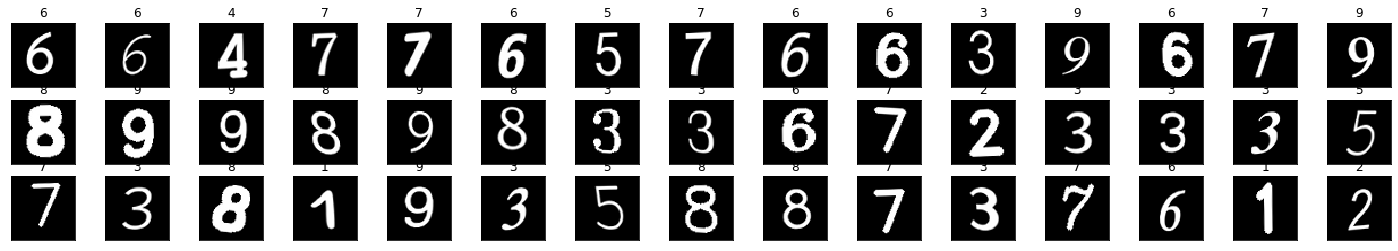

In [10]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(45):
    ax = fig.add_subplot(3, 15, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()+1))

In [11]:
criterion = torch.nn.CrossEntropyLoss()
    
test_loss = 0.0
class_correct = list(0. for i in range(9))
class_total = list(0. for i in range(9))

model1.to(device)
model1.eval() # prep model for *evaluation*

for batch in train_loader:
    batch_X, batch_y = batch

    batch_X = batch_X.to(device)
    batch_y = batch_y.to(device)

    model1.zero_grad()
    output = model1(batch_X)
    loss = criterion(output, batch_y) 
    
    test_loss += loss.item()*batch_X.size(0)
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(batch_y.data.view_as(pred)))

    for i in range(len(batch_y)):
        label = batch_y.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(9):
    print(i)
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i+1), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (test_dataset.classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.000001

0
Test Accuracy of     1: 100% (110/110)
1
Test Accuracy of     2: 100% (110/110)
2
Test Accuracy of     3: 100% (110/110)
3
Test Accuracy of     4: 100% (110/110)
4
Test Accuracy of     5: 100% (110/110)
5
Test Accuracy of     6: 100% (110/110)
6
Test Accuracy of     7: 100% (110/110)
7
Test Accuracy of     8: 100% (110/110)
8
Test Accuracy of     9: 100% (110/110)

Test Accuracy (Overall): 100% (990/990)
